In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 
from sklearn.decomposition import PCA 

In [3]:
# load data 

iris = load_iris()
X = iris.data
y = iris.target 

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [4]:
#apply PCA 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
total_variance = np.sum(explained_variance)




In [5]:
# checkig shape after PCA 
print("PCA transformaed shape: ",X_pca.shape)

PCA transformaed shape:  (150, 2)


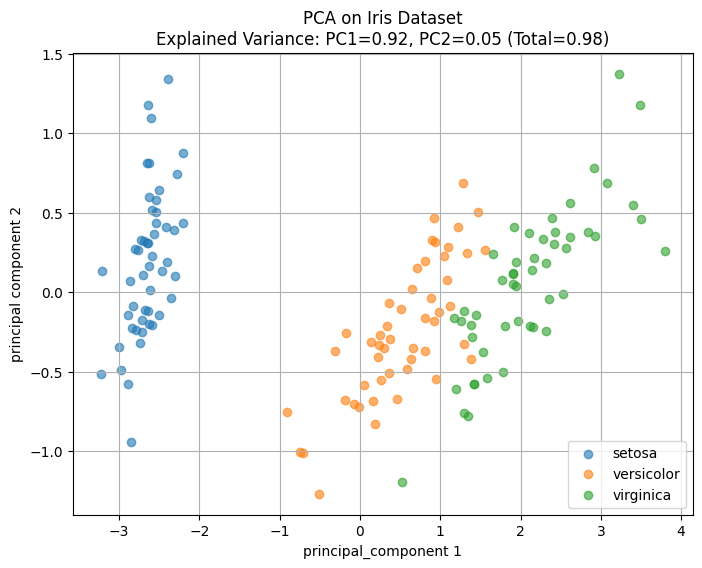

In [6]:
#plotting the 2d pca result 
plt.figure(figsize=(8,6))

for target, color in zip([0,1,2],['r','g','b']):
    plt.scatter(X_pca[y==target,0],X_pca[y==target,1],label = iris.target_names[target],alpha=0.6)
    
    
    
plt.xlabel("principal_component 1")
plt.ylabel("principal component 2")
plt.legend()
plt.title(f'PCA on Iris Dataset\nExplained Variance: PC1={explained_variance[0]:.2f}, PC2={explained_variance[1]:.2f} (Total={total_variance:.2f})')
plt.grid(True)
plt.show()

### now Using SVM we are creating decision boundaries 



In [20]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [11]:
# step 1: loading the data 

iris = load_iris()
X =iris.data
y= iris.target

target_names = iris.target_names
colors = ["steelblue","darkorange","green"]



In [12]:
#step 2: standardize 
X_std = StandardScaler().fit_transform(X)
 

In [13]:
#step3 : Apply PCA to reduce to 2D 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
explained_variance = pca.explained_variance_ratio_


In [15]:
#step 4 = train SVM on 2D PCA transformed data 

svm_clf = SVC(kernel = "linear",C=1.0)
svm_clf.fit(X_pca,y)


SVC(kernel='linear')

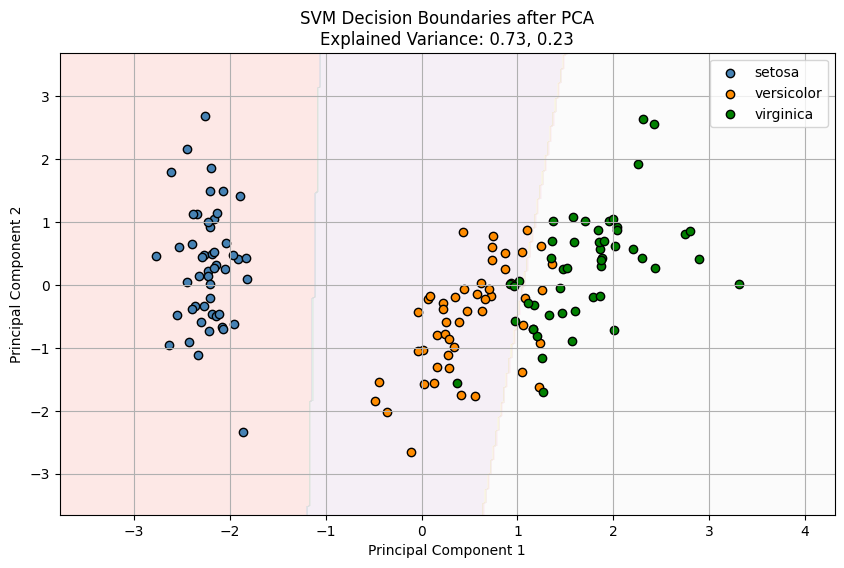

In [16]:
# step 5 :  plot ecision boundaries 

# Create a mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict for each point in the grid
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')  # Decision boundaries

# Overlay actual points
for i, color in zip([0, 1, 2], colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=color, label=target_names[i], edgecolors='k')

# Labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'SVM Decision Boundaries after PCA\nExplained Variance: {explained_variance[0]:.2f}, {explained_variance[1]:.2f}')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
y_pred= svm_clf.predict(X_pca)

print("Accuracy on pca-reduced data: ",accuracy_score(y,y_pred))

print("classification report : ",classification_report(y,y_pred,target_names=target_names))

print("confusion_matrix: ",confusion_matrix(y,y_pred))

Accuracy on pca-reduced data:  0.9133333333333333
classification report :                precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.89      0.84      0.87        50
   virginica       0.85      0.90      0.87        50

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150

confusion_matrix:  [[50  0  0]
 [ 0 42  8]
 [ 0  5 45]]


### PCA using 3 componenets 

C:\Users\Dell\AppData\Local\Temp\ipykernel_13112\3425776319.py:33: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from current font.
  plt.tight_layout()
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


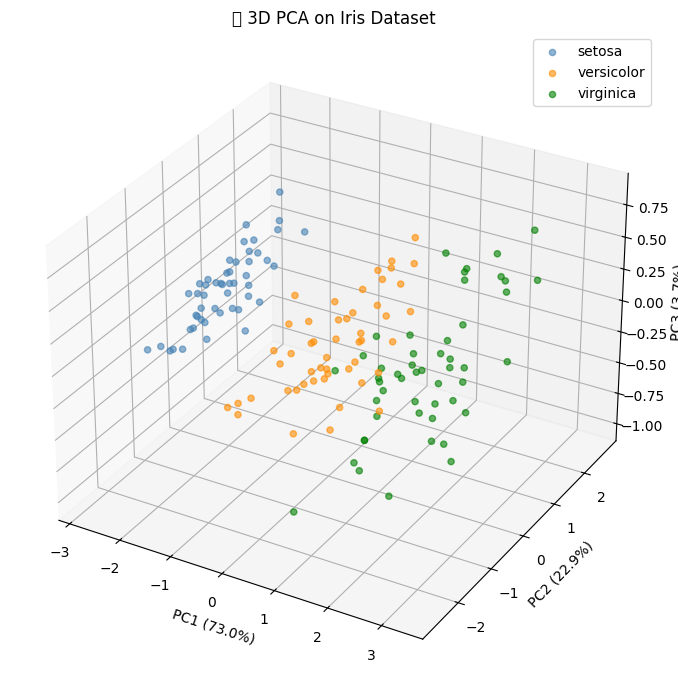

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # For 3D plots

# 🔹 Load and standardize the dataset
iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
y = iris.target
target_names = iris.target_names
colors = ['steelblue', 'darkorange', 'green']

# 🔹 Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X)
explained = pca.explained_variance_ratio_

# 🔹 3D Visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i, color in zip([0, 1, 2], colors):
    ax.scatter(X_pca_3d[y == i, 0], X_pca_3d[y == i, 1], X_pca_3d[y == i, 2],
               label=target_names[i], color=color, alpha=0.6)

ax.set_xlabel(f'PC1 ({explained[0]*100:.1f}%)')
ax.set_ylabel(f'PC2 ({explained[1]*100:.1f}%)')
ax.set_zlabel(f'PC3 ({explained[2]*100:.1f}%)')
ax.set_title('🌸 3D PCA on Iris Dataset')
ax.legend()
plt.tight_layout()
plt.show()
